# Exploratory Data Analysis
This notebook performs EDA for a short video recommendation system using the Kuairec dataset.

## 1. Data Loading
Load necessary libraries and datasets.

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
base_dir = "KuaiRec/data/"
small_matrix = pd.read_csv(base_dir + 'small_matrix.csv')
big_matrix = pd.read_csv(base_dir + 'big_matrix.csv')
user_features = pd.read_csv(base_dir + 'user_features.csv')
social_network = pd.read_csv(base_dir + 'social_network.csv')
item_categories = pd.read_csv(base_dir + 'item_categories.csv')
item_daily_features = pd.read_csv(base_dir + 'item_daily_features.csv')
caption_category = pd.read_csv(base_dir + 'kuairec_caption_category.csv', engine='python', encoding='utf-8', on_bad_lines='skip')

## 2. Quick Data Inspection
Inspect dataset shapes, glimpse samples, and basic statistics.

In [3]:
display(big_matrix.head())

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [4]:
display(small_matrix.head())

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


In [5]:
display(user_features.head())

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
display(social_network.head())

,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]


In [7]:
display(item_daily_features.head())

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


In [8]:
display(caption_category.head())

,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
1,1,UNKNOWN,NaN,[],27.0,高新数码,-124.0,UNKNOWN,-124.0,UNKNOWN
2,2,UNKNOWN,晚饭后，运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
3,3,UNKNOWN,我平淡无奇，惊艳不了时光，温柔不了岁月，我只想漫无目的的走走，努力发笔小财，给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装


## 3. Data Cleaning
Handle missing values, duplicates, and anomalies.

In [9]:
user_features.fillna(-1, inplace=True)

social_network.dropna(inplace=True)
social_network["friend_list"] = social_network["friend_list"].map(eval)

item_categories.dropna(inplace=True)
item_categories["feat"] = item_categories["feat"].map(eval)

item_daily_features.fillna(-1, inplace=True)

caption_category.dropna(inplace=True)
caption_category.drop_duplicates(inplace=True)

def cleanup(df):
    before = len(df)
    df = df.dropna().drop_duplicates()
    df = df[df["timestamp"] >= 0]
    after = len(df)
    print(f"Dropped {before-after}/{before} rows")
    return df
    
big_matrix = cleanup(big_matrix)
small_matrix = cleanup(small_matrix)

Dropped 965819/12530806 rows
Dropped 181992/4676570 rows


Quick Inspections after the data cleaning process.

In [10]:
display(big_matrix.describe())

,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,1.156499e+07,1.156499e+07,1.156499e+07,1.156499e+07,1.156499e+07,1.156499e+07,1.156499e+07
mean,3.573101e+03,5.050834e+03,9.020180e+03,1.455545e+04,2.020080e+07,1.596749e+09,9.465882e-01
std,2.066797e+03,3.093120e+03,1.545583e+04,1.980941e+04,5.262055e+01,1.535486e+06,1.678802e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,2.020070e+07,1.592872e+09,0.000000e+00
25%,1.787000e+03,2.374000e+03,4.213000e+03,7.400000e+03,2.020080e+07,1.596308e+09,3.165311e-01
50%,3.577000e+03,4.835000e+03,7.271000e+03,9.634000e+03,2.020081e+07,1.596683e+09,7.254138e-01
75%,5.340000e+03,7.601000e+03,1.034400e+04,1.211700e+04,2.020083e+07,1.598484e+09,1.179920e+00
max,7.175000e+03,1.072700e+04,9.996390e+05,3.150720e+05,2.020090e+07,1.599694e+09,5.734571e+02


In [11]:
display(small_matrix.describe())

,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,4.494578e+06,4.494578e+06,4.494578e+06,4.494578e+06,4.494578e+06,4.494578e+06,4.494578e+06
mean,3.630565e+03,4.974329e+03,8.593395e+03,1.422409e+04,2.020077e+07,1.596241e+09,9.113757e-01
std,2.044064e+03,3.064401e+03,1.215069e+04,1.989596e+04,4.895180e+01,1.254444e+06,1.356487e+00
min,1.400000e+01,1.030000e+02,0.000000e+00,3.067000e+03,2.020070e+07,1.593801e+09,0.000000e+00
25%,1.834000e+03,2.369000e+03,5.803000e+03,7.500000e+03,2.020072e+07,1.595210e+09,4.735875e-01
50%,3.687000e+03,4.692000e+03,7.537000e+03,9.560000e+03,2.020080e+07,1.596224e+09,7.745146e-01
75%,5.417000e+03,7.471000e+03,9.858000e+03,1.181900e+04,2.020081e+07,1.597121e+09,1.124976e+00
max,7.162000e+03,1.059500e+04,7.988155e+06,3.150720e+05,2.020090e+07,1.599321e+09,5.715214e+02


In [12]:
display(user_features.describe())

,user_id,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,fans_user_num,friend_user_num,register_days,onehot_feat0,onehot_feat1,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,...,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000
mean,3587.500000,0.000418,0.006828,0.169593,197.327899,12.553094,4.494844,296.790691,0.392280,2.670569,...,168.661511,3.831940,2.264353,0.137124,0.284838,0.093088,0.083333,0.008082,0.007386,0.004041
std,2071.677098,0.020444,0.082357,0.375301,426.543245,181.017537,44.897861,286.381320,0.488293,1.782502,...,96.254783,1.747046,1.063131,0.500184,0.474550,0.324562,0.311938,0.169250,0.167211,0.157012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1793.750000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,132.000000,0.000000,1.000000,...,88.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3587.500000,0.000000,0.000000,0.000000,33.000000,2.000000,0.000000,225.000000,0.000000,2.000000,...,167.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5381.250000,0.000000,0.000000,0.000000,130.000000,6.000000,1.000000,324.000000,1.000000,4.000000,...,255.000000,5.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7175.000000,1.000000,1.000000,1.000000,2100.000000,11401.000000,1425.000000,2245.000000,1.000000,7.000000,...,339.000000,6.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
display(social_network.describe())

,user_id
count,472.000000
mean,3403.218220
std,2079.018308
min,18.000000
25%,1648.000000
50%,3268.000000
75%,5233.500000
max,7174.000000


In [14]:
display(item_daily_features.describe())

,video_id,date,author_id,video_duration,video_width,video_height,music_id,video_tag_id,show_cnt,show_user_num,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
count,343341.000000,3.433410e+05,343341.000000,343341.000000,343341.000000,343341.000000,3.433410e+05,343341.000000,3.433410e+05,3.433410e+05,...,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000,343341.000000
mean,5077.370157,2.020080e+07,4220.959932,12122.237056,713.117833,1218.797452,3.041715e+09,1363.171585,9.424580e+04,8.859975e+04,...,44.557484,39.704049,0.042780,0.037549,50.422289,48.942605,15.749637,15.608614,0.849412,0.831220
std,3113.616949,5.654698e+01,2390.317222,13858.465528,122.673938,165.715482,1.543376e+09,1090.364659,5.761700e+05,5.512458e+05,...,535.575910,471.296386,0.822401,0.695511,281.581431,273.243597,318.545257,315.922533,6.832973,6.639812
min,0.000000,2.020070e+07,0.000000,-1.000000,270.000000,320.000000,0.000000e+00,-124.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2318.000000,2.020073e+07,2126.000000,6700.000000,720.000000,1280.000000,2.354487e+09,144.000000,5.500000e+01,4.700000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5235.000000,2.020081e+07,4402.000000,9291.000000,720.000000,1280.000000,3.921367e+09,1099.000000,1.328000e+03,1.126000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7725.000000,2.020083e+07,6293.000000,12033.000000,720.000000,1280.000000,4.098158e+09,2491.000000,2.419000e+04,2.161600e+04,...,3.000000,3.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
max,10727.000000,2.020090e+07,8369.000000,315040.000000,3024.000000,3024.000000,4.431044e+09,2891.000000,4.218154e+07,3.893533e+07,...,134099.000000,133802.000000,198.000000,176.000000,34454.000000,33720.000000,116971.000000,115859.000000,2056.000000,1971.000000


In [15]:
display(caption_category.describe())

,first_level_category_id,second_level_category_id,third_level_category_id
count,9369.000000,9369.000000,9369.000000
mean,16.626428,267.531433,656.753762
std,13.961322,338.969736,1098.812928
min,-124.000000,-124.000000,-124.000000
25%,7.000000,-124.000000,-124.000000
50%,15.000000,223.000000,-124.000000
75%,28.000000,680.000000,1524.000000
max,39.000000,749.000000,2676.000000


## 4. Data Analysis per File
Detailed analysis for each dataset component.

### Big Matrix Analysis

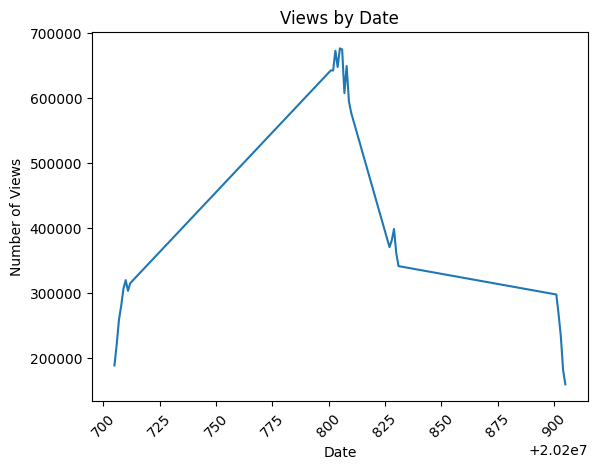

In [16]:
views_per_date = big_matrix.groupby("date").size()
views_per_date.plot()
plt.title("Views by Date")
plt.xlabel("Date")
plt.ylabel("Number of Views")
plt.xticks(rotation=45)
plt.show()

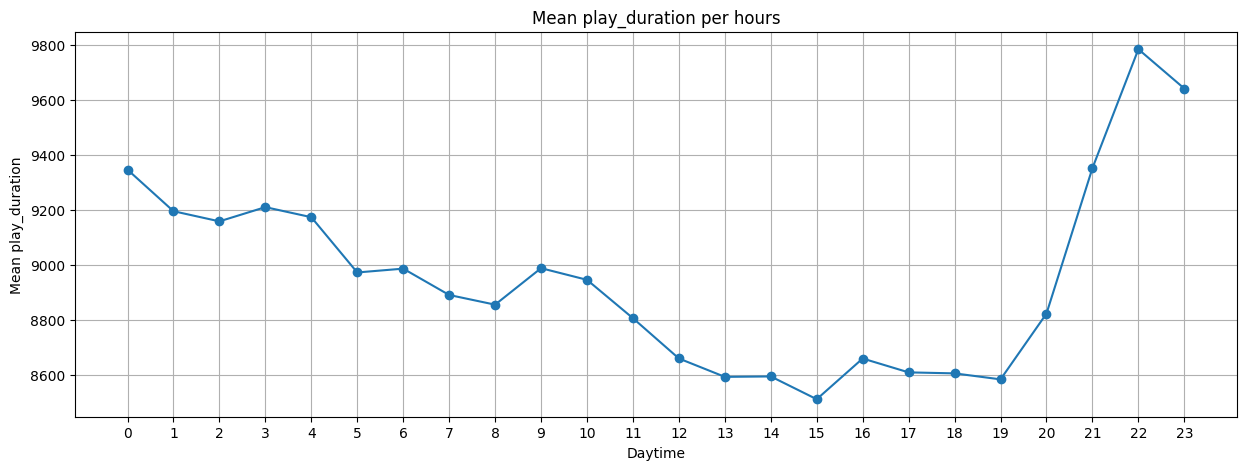

In [17]:
big_matrix["datetime"] = pd.to_datetime(big_matrix["timestamp"], unit="s")
big_matrix["hour"] = big_matrix["datetime"].dt.hour
avg_play_by_hour = big_matrix.groupby("hour")["play_duration"].mean()
plt.figure(figsize=(15, 5))
plt.plot(avg_play_by_hour.index, avg_play_by_hour.values, marker="o")
plt.title("Mean play_duration per hours")
plt.xlabel("Daytime")
plt.ylabel("Mean play_duration")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

big_matrix = big_matrix.drop(columns=['datetime', 'hour'])

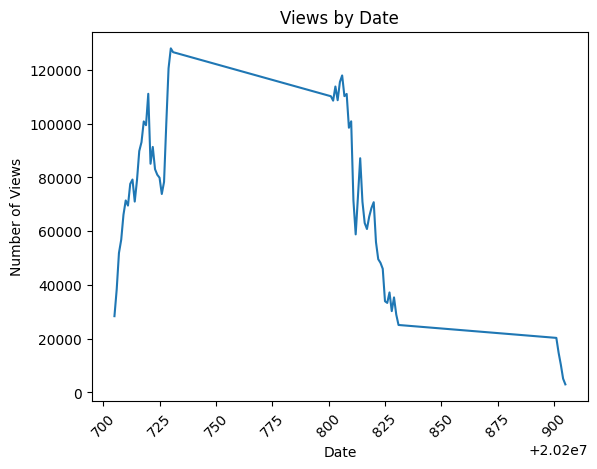

In [18]:
views_per_date = small_matrix.groupby("date").size()
views_per_date.plot()
plt.title("Views by Date")
plt.xlabel("Date")
plt.ylabel("Number of Views")
plt.xticks(rotation=45)
plt.show()

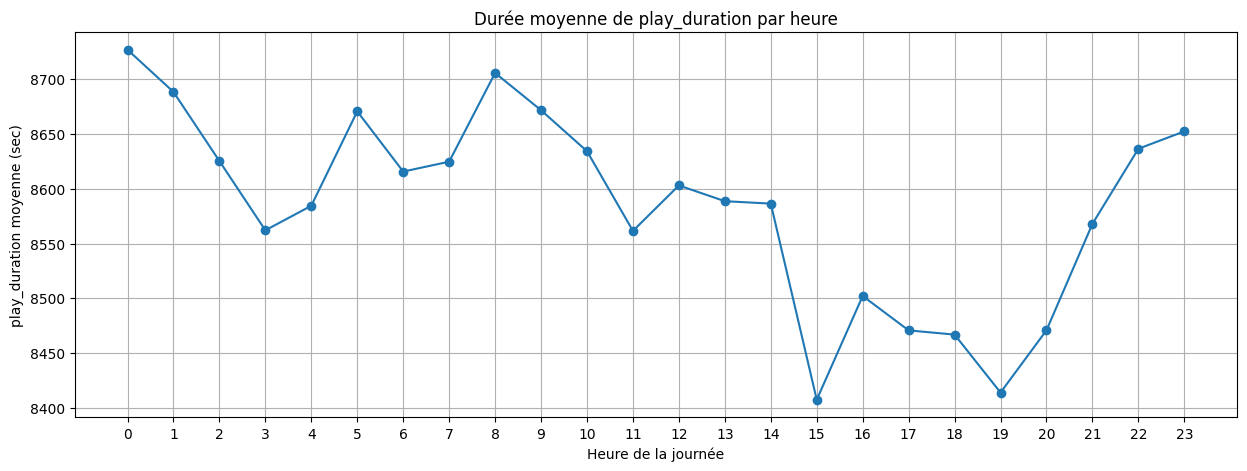

In [19]:
small_matrix["datetime"] = pd.to_datetime(small_matrix["timestamp"], unit="s")
small_matrix["hour"] = small_matrix["datetime"].dt.hour
avg_play_by_hour = small_matrix.groupby("hour")["play_duration"].mean()
plt.figure(figsize=(15, 5))
plt.plot(avg_play_by_hour.index, avg_play_by_hour.values, marker="o")
plt.title("Durée moyenne de play_duration par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("play_duration moyenne (sec)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

small_matrix = small_matrix.drop(columns=['datetime', 'hour'])

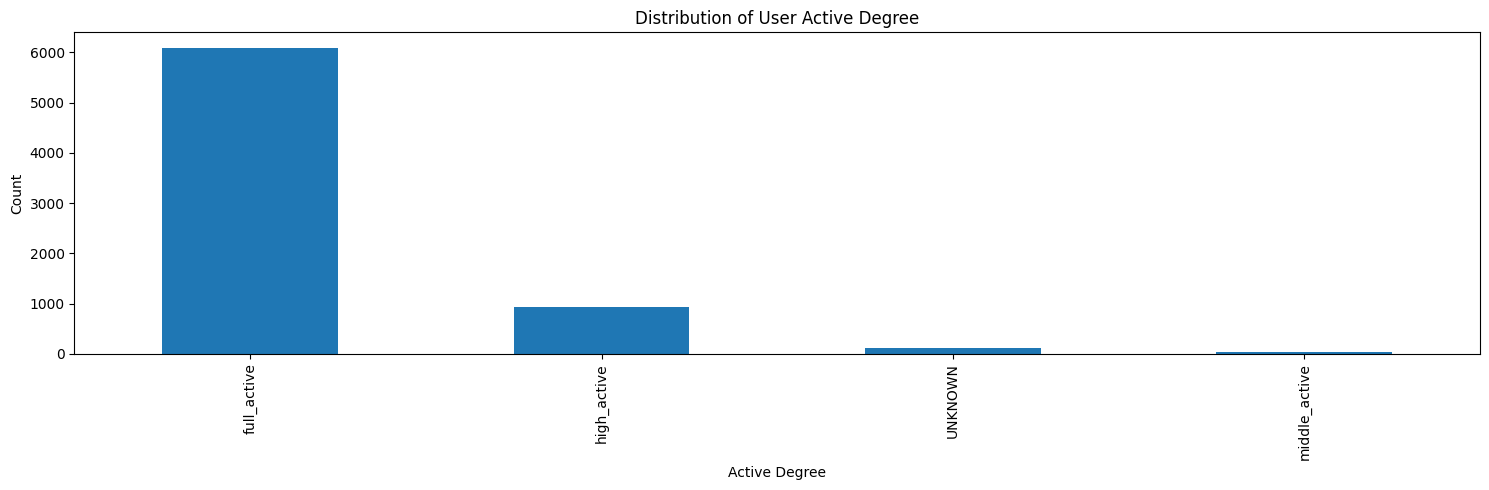

In [20]:
plt.figure(figsize=(15, 5))
user_features['user_active_degree'].value_counts().plot(kind='bar')
plt.title('Distribution of User Active Degree')
plt.xlabel('Active Degree')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

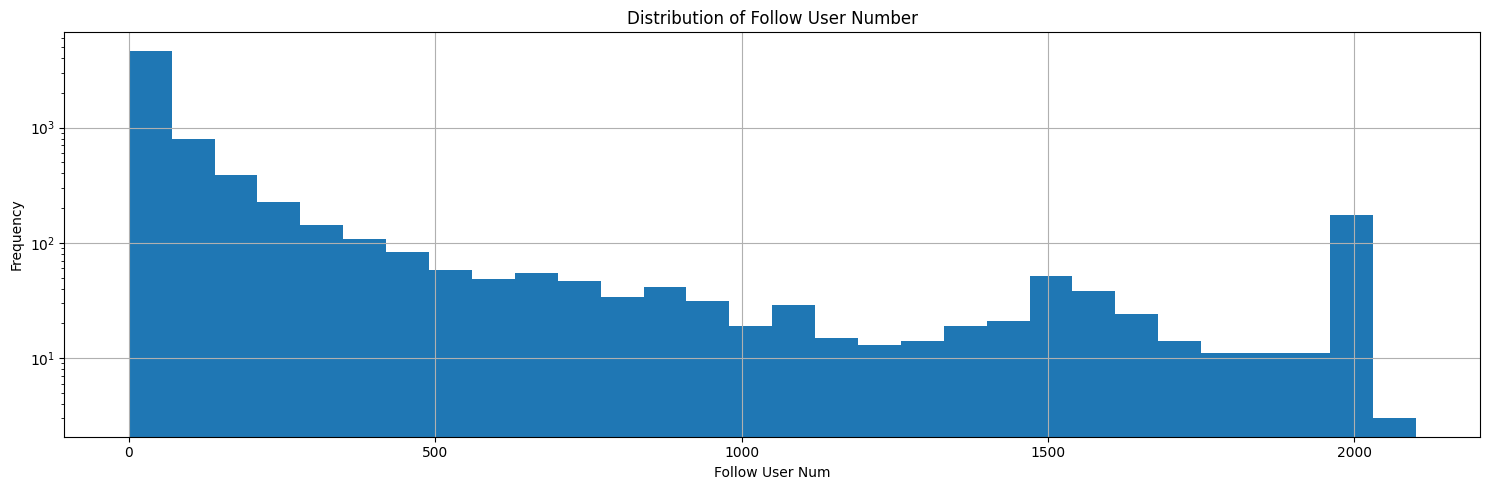

In [21]:
plt.figure(figsize=(15, 5))
user_features['follow_user_num'].hist(bins=30, log=True)
plt.title('Distribution of Follow User Number')
plt.xlabel('Follow User Num')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

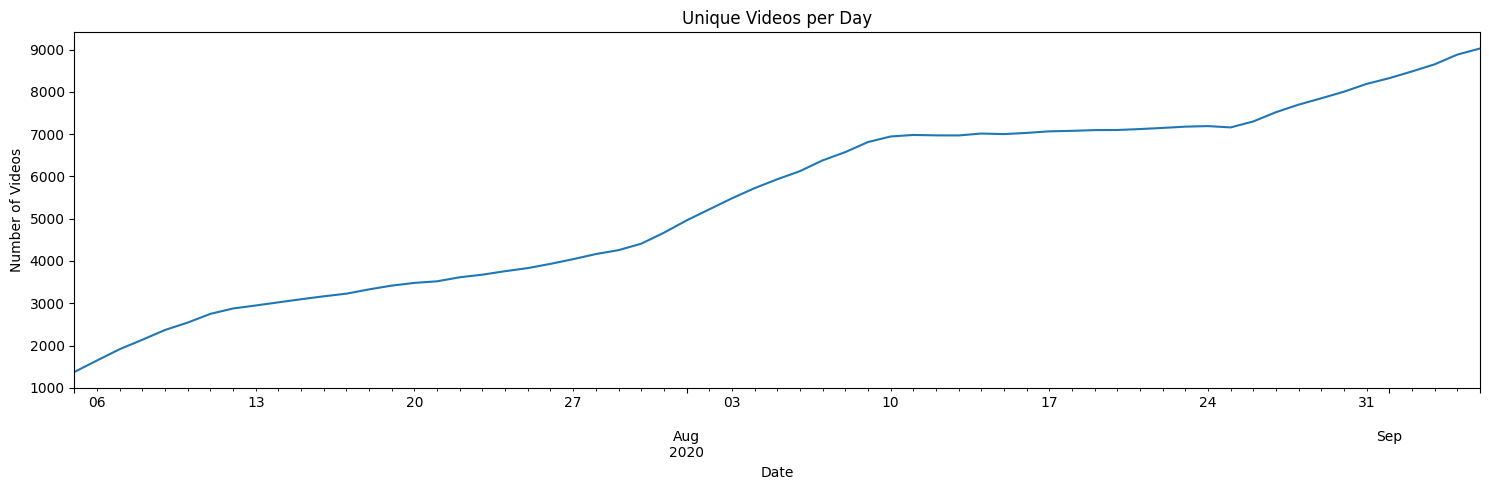

In [22]:
item_daily_features['date'] = pd.to_datetime(item_daily_features['date'], format='%Y%m%d')
item_daily_features['upload_dt'] = pd.to_datetime(item_daily_features['upload_dt'])

daily_counts = item_daily_features.groupby('date')['video_id'].nunique()
plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title('Unique Videos per Day')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()

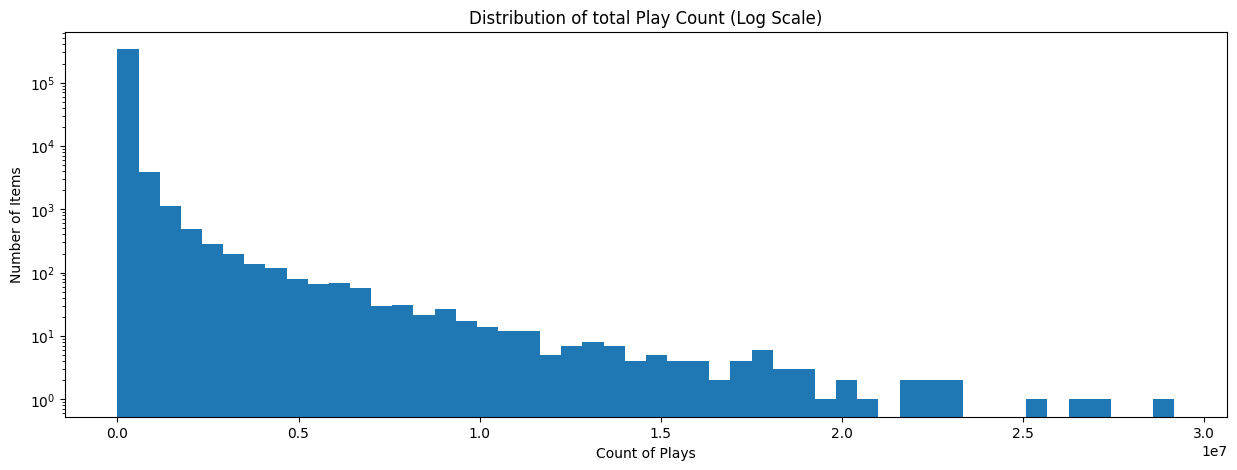

In [23]:
plt.figure(figsize=(15, 5))
plt.hist(item_daily_features['valid_play_cnt'], bins=50, log=True)
plt.ylabel('Number of Items')
plt.xlabel('Count of Plays')
plt.title('Distribution of total Play Count (Log Scale)')
plt.show()

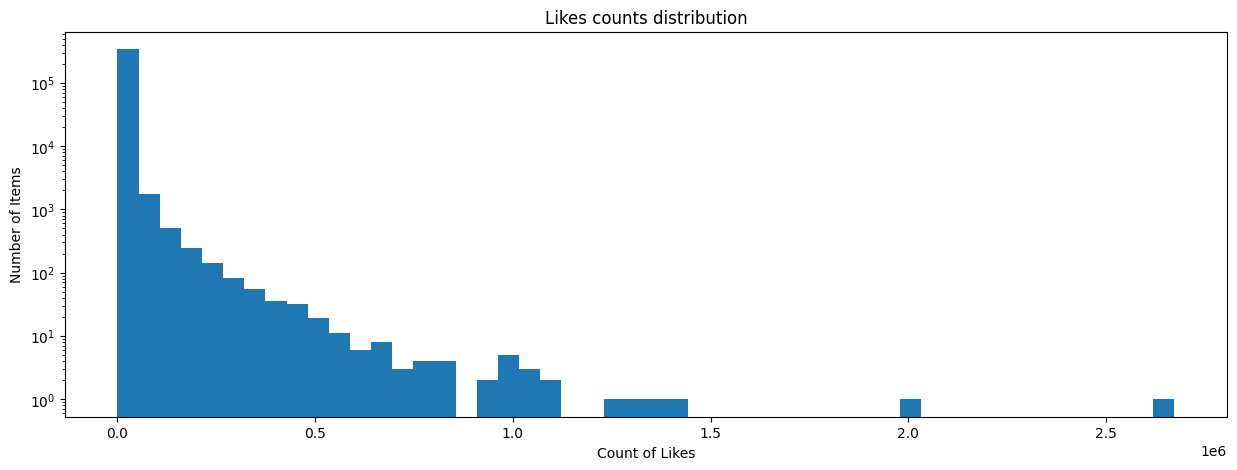

In [24]:
plt.figure(figsize=(15, 5))
plt.hist(item_daily_features['like_cnt'], bins=50, log=True)
plt.ylabel('Number of Items')
plt.xlabel('Count of Likes')
plt.title('Likes counts distribution')
plt.show()

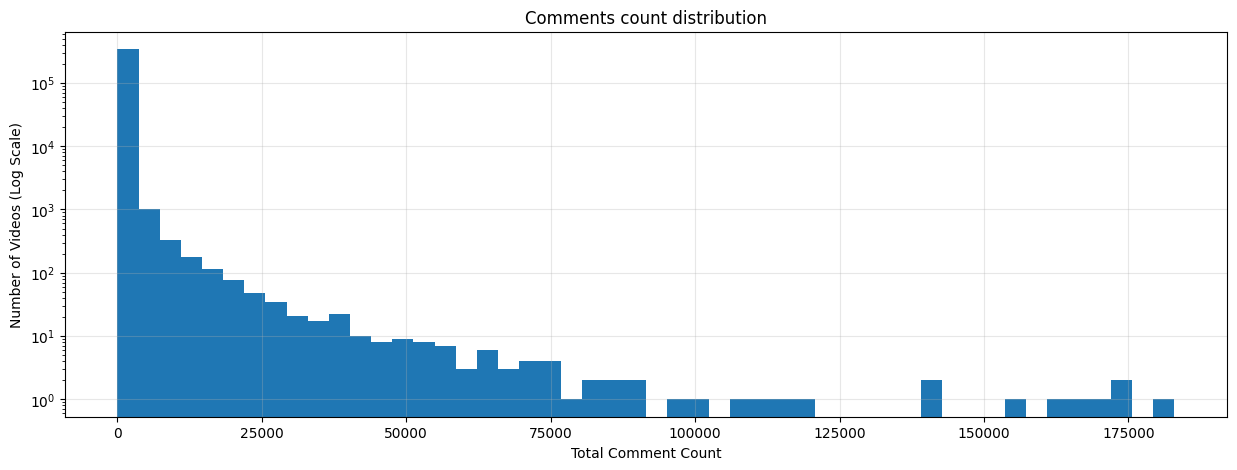

In [25]:
plt.figure(figsize=(15, 5))
plt.hist(item_daily_features['comment_cnt'], bins=50, log=True)
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Total Comment Count')
plt.title('Comments count distribution')
plt.grid(True, alpha=0.3)
plt.show()

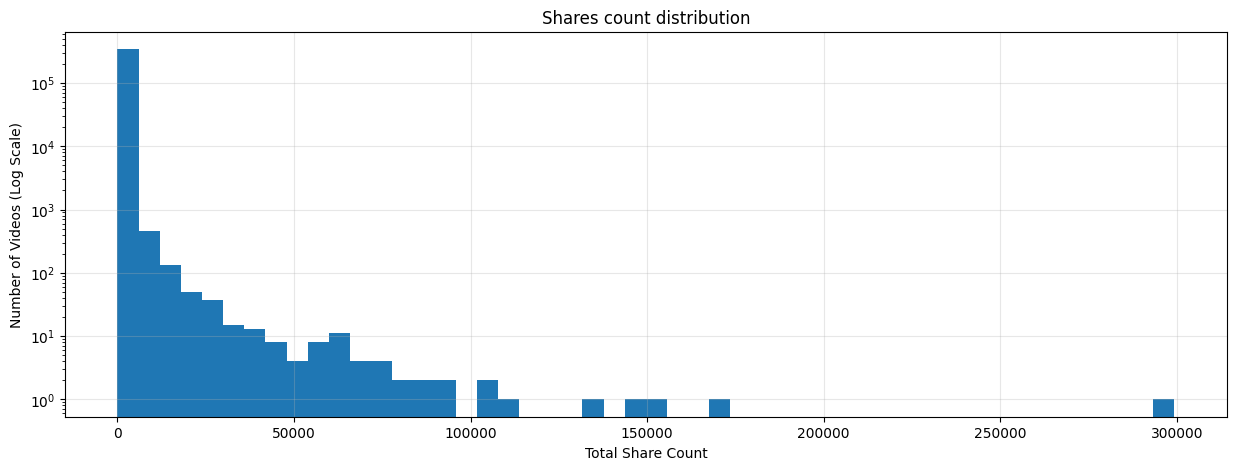

In [26]:
plt.figure(figsize=(15, 5))
plt.hist(item_daily_features['share_cnt'], bins=50, log=True)
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Total Share Count')
plt.title('Shares count distribution')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Clean Data Saving

In [27]:
base_dir = "processed_data/"
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

small_matrix.to_csv(base_dir + 'small_matrix.csv', index=False)
big_matrix.to_csv(base_dir + 'big_matrix.csv', index=False)
user_features.to_csv(base_dir + 'user_features.csv', index=False)
social_network.to_csv(base_dir + 'social_network.csv', index=False)
item_categories.to_csv(base_dir + 'item_categories.csv', index=False)
item_daily_features.to_csv(base_dir + 'item_daily_features.csv', index=False)
caption_category.to_csv(base_dir + 'caption_category.csv', index=False)